In [10]:
%load_ext autoreload
%autoreload 2
from torch_snippets import *
from utils.create_video_on_hdf5.create_content_on_hdf5 import read_hdf5_test, convert_to_yolo_format

FILE_NAME_PREFIX = 'small_'
DUMPFOLDER = 'small_data_vehicle_pedestrian_detection'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
files = Glob(f'data/{FILE_NAME_PREFIX}*')

2020-09-01 19:38:44.095 | INFO     | torch_snippets.loader:Glob:158 - 1 files found at data/small_*


In [12]:
for filename in files:
    try:
        data = read_hdf5_test(filename)
        convert_to_yolo_format(filename, f'{DUMPFOLDER}/obj')
    except: ...

In [13]:
def writelines(list_of_strings, fpath):
    with open(fpath, 'w') as f:
        for l in list_of_strings:
            f.write(f'{l}\n')
            
def make_train_test_split(data_folder, output_folder):
    makedir(output_folder)
    files = Glob(data_folder+'/*.png')
    from sklearn.model_selection import train_test_split
    trn_fls, val_fls = train_test_split([fname(f) for f in files])
    writelines([f'data/obj/{f}' for f in trn_fls], f'{output_folder}/train.txt')
    writelines([f'data/obj/{f}' for f in val_fls], f'{output_folder}/val.txt')
    
make_train_test_split(f'{DUMPFOLDER}/obj', f'{DUMPFOLDER}')

2020-09-01 19:38:45.284 | INFO     | torch_snippets.loader:Glob:158 - 4 files found at small_data_vehicle_pedestrian_detection/obj/*.png


### Inspect Saved Data

2020-09-01 19:39:03.333 | INFO     | torch_snippets.loader:Glob:158 - 8 files found at small_data_vehicle_pedestrian_detection/obj


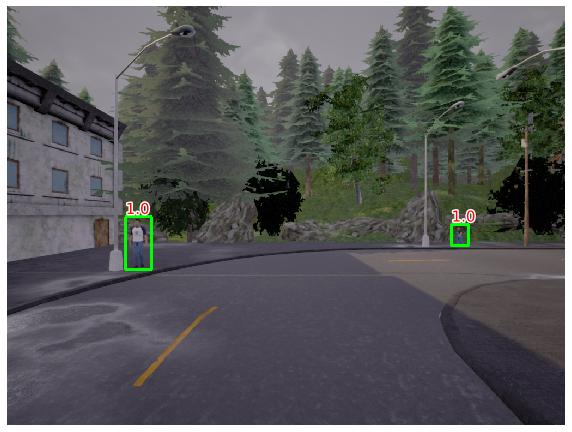

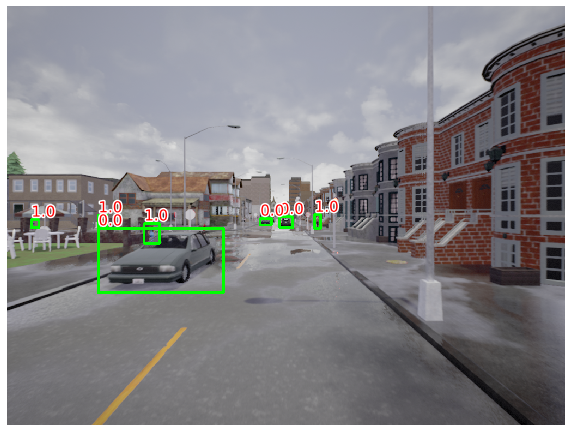

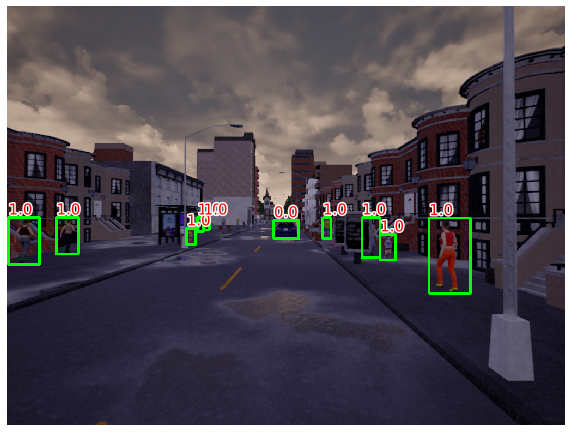

In [15]:
def readlines(fpath):
    with open(fpath, 'r') as f:
        t = f.read().split('\n')
        t = [l.strip() for l in t if l.strip()!='']
        t = [[j for j in l.split()] for l in t]
        t = np.array([(int(a),*[float(i) for i in [b,c,d,e]]) for a,b,c,d,e in t])
        clss, bbs = t[:,0], t[:,1:]
        return clss, bbs

items = unique(stems(f'{DUMPFOLDER}/obj'))
for i in range(3):
    item = items[i]
    im = read(f'{DUMPFOLDER}/obj/{item}.png',1)
    h,w = im.shape[:2]
    clss, bbs = readlines(f'{DUMPFOLDER}/obj/{item}.txt')
    bbs = (bbs * np.array([w,h,w,h])).astype(np.uint32)
    show(im, bbs=bbs, sz=10, texts=clss)